# Problem Statement
### This project is about learning the patterns of diamond features such as carat, cut, color, clarity, etc to determine the valuation or price of the diamond

### Dataset is from kaggle: https://www.kaggle.com/datasets/amirhosseinmirzaie/diamonds-price-dataset
#### The features are:
1. carat: Diamond weight in carat
2. cut: Diamond cutting quality
3. color: Diamond color from J (worst) to D (best)
4. clarity: A measure of diamond clarity (from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
5. x: diamond length in mm
6. y: diamond width in mm
7. z: diamond depth in mm
8. depth: Percentage depth that is equal to z / mean(x,y)
9. table: The width of the widest point at the top of the diamond

10. Price is the target

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, max_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Read csv and do
##### 1. Check the data shape, distribution
##### 2. Check null and decide should do impute or remove (the whole X or after split test and train)
##### 3. Check duplicate.
##### 4. Recheck data shape and distribution
##### 5. Print the categorical data and see how many category for each of them
##### 6. Plot the categorial features to see the distribution, relationship with the target to check outlier
##### 7. Decide what kind of encoder need to be used for the category
##### 8. Plot the numerical features to check the distribution, relationship with the target: linear, log, exponential
##### 9. Plot the numerical features to check outliers and decide to keep or remove
##### 10. Based on the data exploration decide what kind of standarization to apply

In [2]:
df = pd.read_csv('./data/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(50000, 10)

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### First glance from the desribe, the mean is quite close to the 50% percentile

In [5]:
# check if there is null
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
918,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
919,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
920,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
921,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1871,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
43809,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
44431,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
45694,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
46396,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [7]:
df.duplicated().sum()

126

In [8]:
#remove the duplicate
df = df.drop_duplicates()
df.shape

(49874, 10)

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,0.799331,61.751803,57.458786,3945.384569,5.734441,5.738060,3.541028
std,0.474607,1.428207,2.231087,3996.939331,1.122340,1.144973,0.706607
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.720000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2414.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5352.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### 5. Print out categorical data
#### 6. Plot the graph

In [10]:
categorical_df = df.select_dtypes(include='O')
for column_name in categorical_df.columns:
    unique_values = categorical_df[column_name].unique()
    print(f'Column name: {column_name}. No of values: {len(unique_values)}. The values are: {unique_values}')

Column name: cut. No of values: 5. The values are: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Column name: color. No of values: 7. The values are: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Column name: clarity. No of values: 8. The values are: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [11]:
def create_subplot_categorical(x: str, y=str):
    fig = plt.figure(figsize=(6, 12))
    gs = fig.add_gridspec(2,1)
    
    ax1 = fig.add_subplot(gs[0,0])
    sns.histplot(data=df, x=x)
    plt.xlabel(x.capitalize())
    plt.show()
    
    ax2 = fig.add_subplot(gs[1,0])
    sns.catplot(data=df, x=x, y=y, kind='boxen', aspect=1.2)
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.grid()

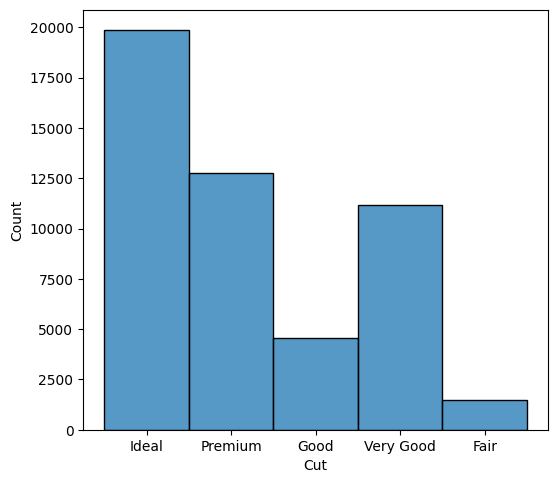

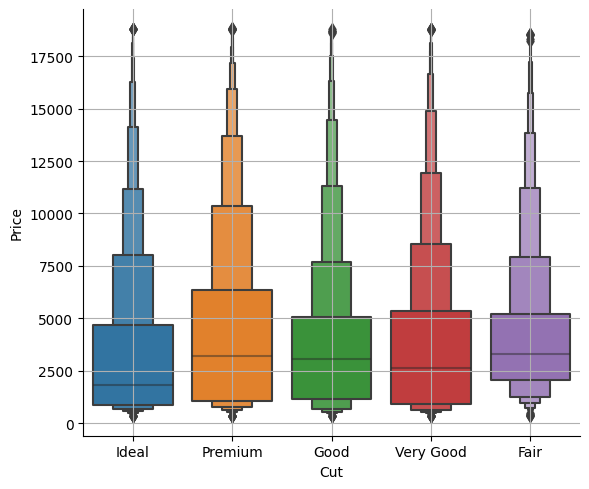

In [12]:
create_subplot_categorical(x='cut', y='price')

#### Cut categorical summary:
1. Ideal cut seems to be at the lower price as shown by the boxen plot. Fattest portion is overall lower compare to the rest
2. On the other hand, Premium cut at the higher price. Fattest portion is higher.
3. In term of the extreme lowest and highest price, the data does not show any much significant difference

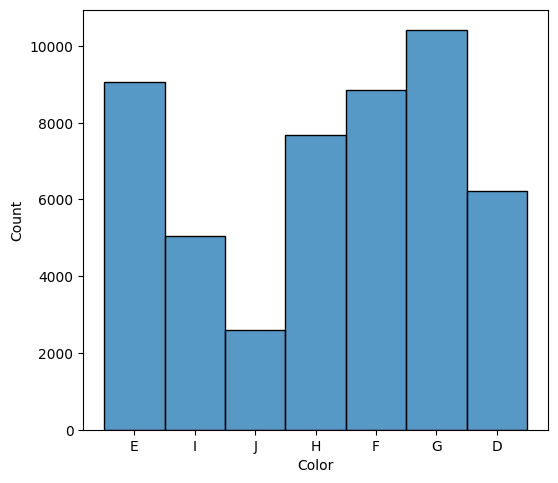

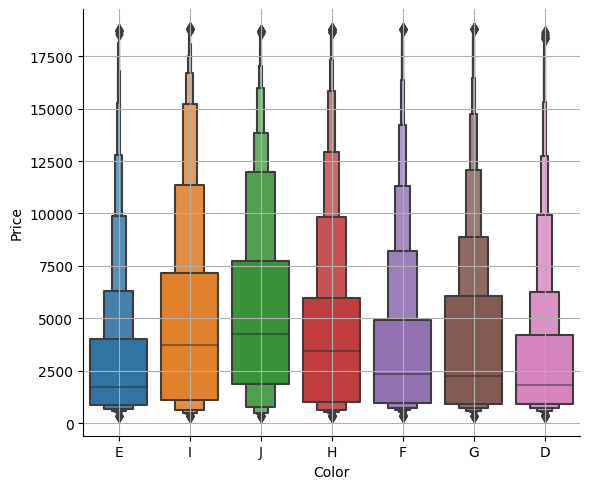

In [13]:
create_subplot_categorical(x='color', y='price')

#### Color categorical summary:
1. Interestingly the J color on average (fattest box) seems to be the highest on average. Although the datasets mention J color is the worst
2. And conversely D seems to be the second lowest after E while the datasets mention D color is the best
3. Highest and lowest also does not have much difference

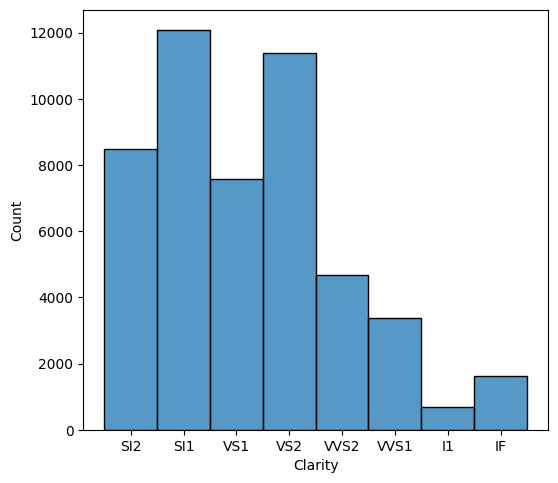

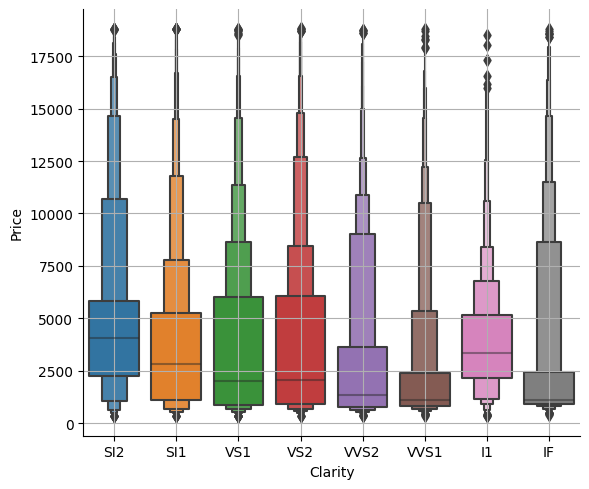

In [14]:
create_subplot_categorical(x='clarity', y='price')

In [15]:
df.sort_values(by='price', ascending=False).head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
25736,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
25735,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
25734,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
25733,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
25732,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
25731,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
25729,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
25730,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
25727,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
25728,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21


### Conclusion on the categorical value analysis

#### Each feature contribute to the price quite equally as there is no eveidence showing that certain feature with the most premium value will command more significant price
#### Some data the distribution is lesser like I1 for the clarity, fair for the cut
#### For encoding we will do Ordinal Encoding as mentioned by the dataset there are different grade for each of the value from the lowest to the highest

In [16]:
numerical_df = df.select_dtypes(exclude='O')
for column_name in numerical_df.columns:
    unique_values = numerical_df[column_name].unique()
    print(f'Column name: {column_name}. No of values: {len(unique_values)}')

Column name: carat. No of values: 272
Column name: depth. No of values: 181
Column name: table. No of values: 126
Column name: price. No of values: 11297
Column name: x. No of values: 553
Column name: y. No of values: 551
Column name: z. No of values: 371


In [17]:
def create_subplot_numerical(x: str, y: str, bins: int):
    fig = plt.figure(figsize=(6,12))
    gs = fig.add_gridspec(3, 1)
    
    ax1=fig.add_subplot(gs[0,0])
    sns.histplot(data=df, x=x, bins=bins)
    plt.xlabel(x.capitalize())
    plt.show()
    
    ax2=fig.add_subplot(gs[1,0])
    sns.lineplot(data=df, x=x, y=y)
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.grid()
    
    ax3=fig.add_subplot(gs[2,0])
    plt.scatter(x=df[x], y=df[y], color='purple')
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.grid()

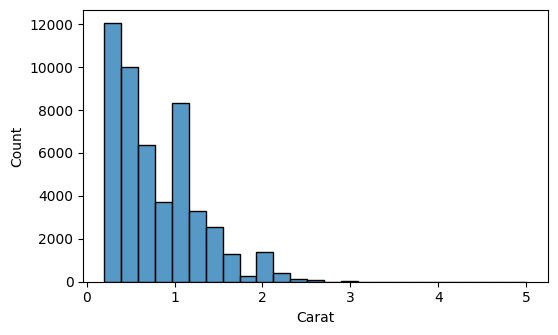

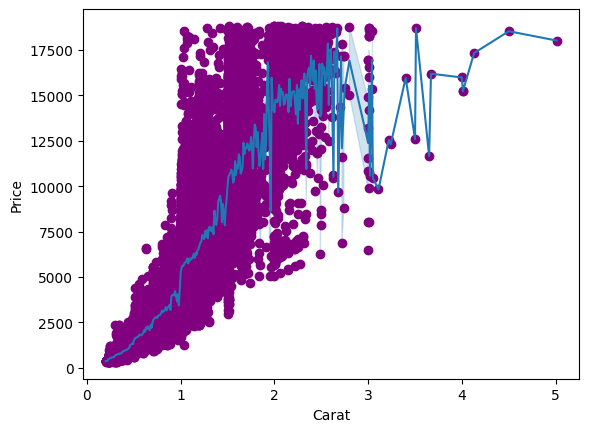

In [18]:
create_subplot_numerical(x='carat', y='price', bins=25)

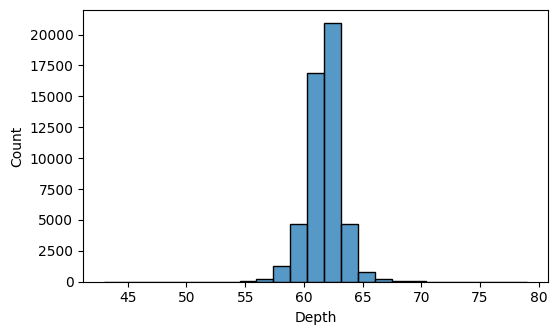

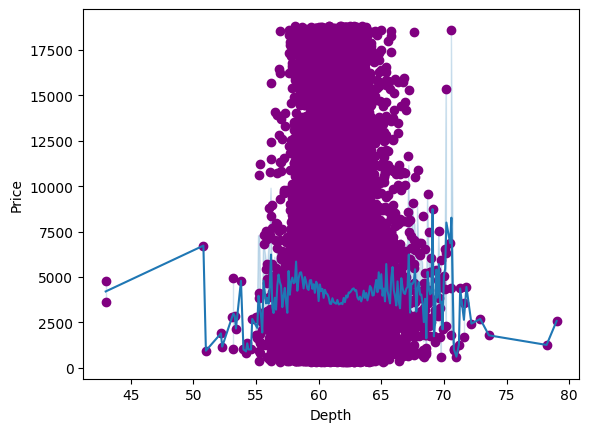

In [19]:
create_subplot_numerical(x='depth', y='price', bins=25)

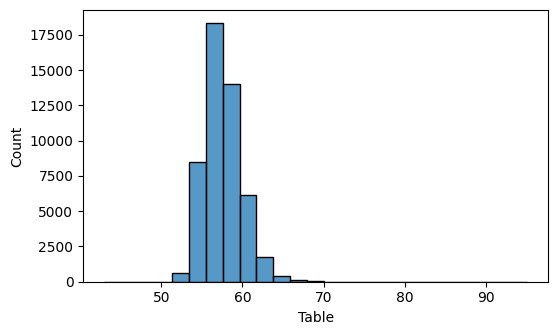

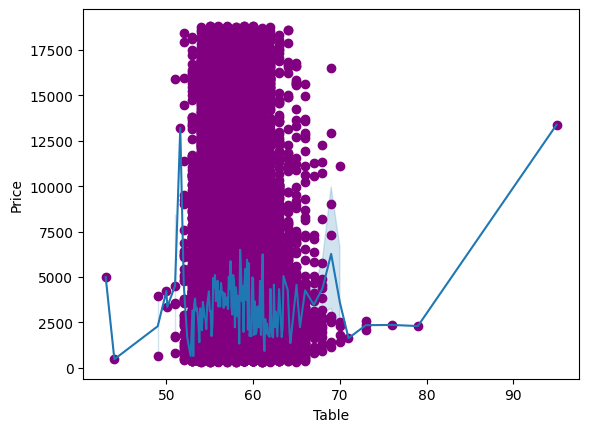

In [20]:
create_subplot_numerical(x='table', y='price', bins=25)

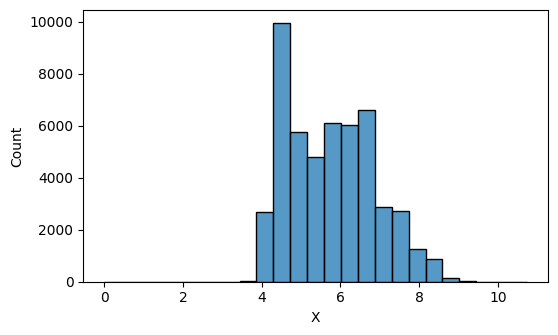

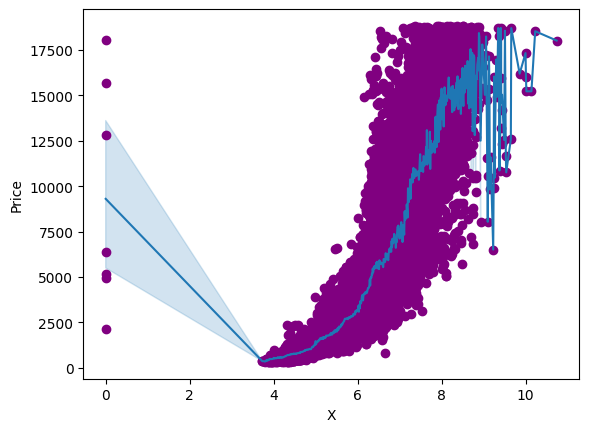

In [21]:
create_subplot_numerical(x='x', y='price', bins=25)

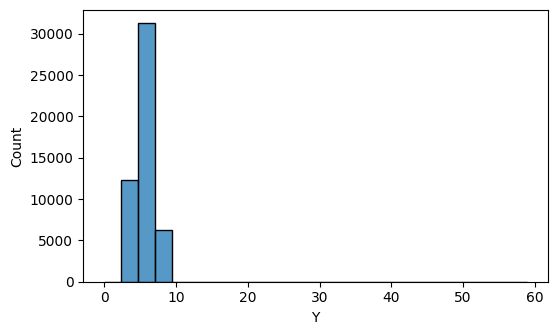

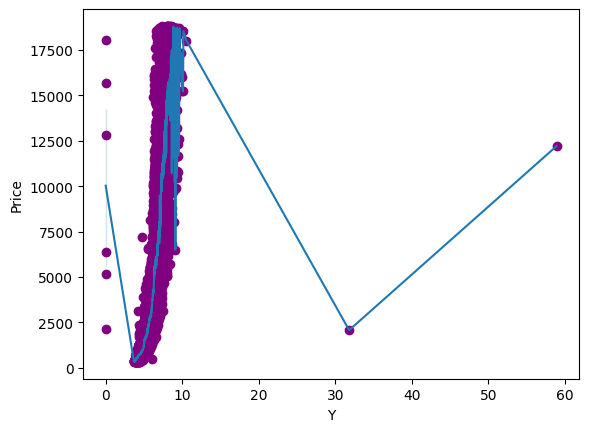

In [22]:
create_subplot_numerical(x='y', y='price', bins=25)

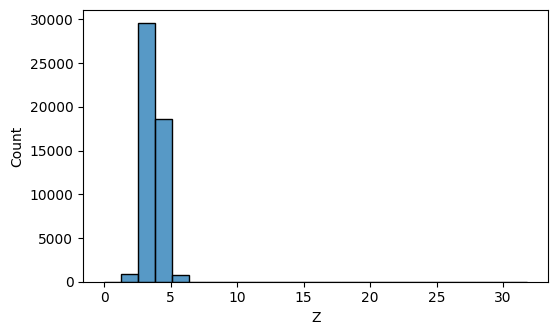

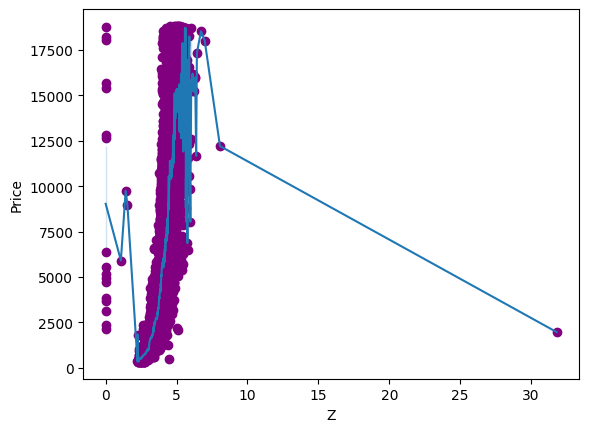

In [23]:
create_subplot_numerical(x='z', y='price', bins=25)

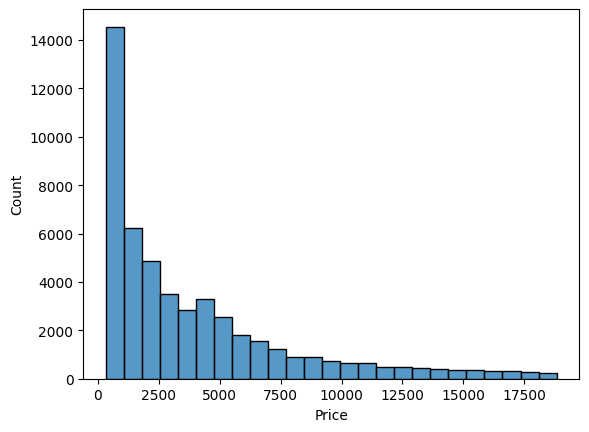

In [24]:
sns.histplot(data=df, x='price', bins=25)
plt.xlabel('Price')
plt.show()

#### On the numerical feature only the carat and the x show exponential relationship
#### Data on the carat, x and price is skewed to the right

### Next split the train and test and create pipeline
1. Test train split 
2. Use Standard scaler
3. Categorical will use Ordinal encoder

In [25]:
X = df.drop('price', axis='columns')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(34911, 9)

In [26]:
num_cols = make_column_selector(dtype_exclude=['O', 'bool'])

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

cut_pipeline = Pipeline([
    ('cut_ord_encoder', OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]))
])

color_pipeline = Pipeline([
    ('color_ord_encoder', OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']]))
])

clarity_pipeline = Pipeline([
    ('clarity_ord_encoder', OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]))
])

column_transformer = ColumnTransformer([
    ('num_transformer', num_pipeline, num_cols),
    ('cut_transformer', cut_pipeline, ['cut']),
    ('color_transformer', color_pipeline, ['color']),
    ('clarity_transformer', clarity_pipeline, ['clarity'])
])

In [27]:
X_transformer = column_transformer.fit_transform(X_train)
X_transformer.shape

(34911, 9)

In [28]:
transformed_feature_names = []
numeric_columns = num_cols(X_train)
transformed_feature_names.extend(numeric_columns)
transformed_feature_names.extend(['cut', 'color', 'clarity'])

X_transformer_df = pd.DataFrame(X_transformer, columns=transformed_feature_names)
train_transformer_df = pd.DataFrame(X_transformer, columns=transformed_feature_names)
train_transformer_df['price'] = y_train.values
X_transformer_df.shape, train_transformer_df.shape

((34911, 9), (34911, 10))

In [29]:
X_test_transformer = column_transformer.transform(X_test)

transformed_feature_names = []
numeric_columns = num_cols(X_train)
transformed_feature_names.extend(numeric_columns)
transformed_feature_names.extend(['cut', 'color', 'clarity'])

X_test_transformer_df = pd.DataFrame(X_test_transformer, columns=transformed_feature_names)
test_transformer_df = pd.DataFrame(X_test_transformer, columns=transformed_feature_names)
test_transformer_df['price'] = y_test.values
X_test_transformer_df.shape, test_transformer_df.shape

((14963, 9), (14963, 10))

In [30]:
def compute_learning_curve(model, title, X_df):
    train_sizes = np.linspace(0.1, 1.0, 20)
    common_params = {
        "X": X_df,
        "y": y_train,
        "train_sizes": train_sizes,
        "cv": 5,
        "n_jobs": -1,
    }

    train_sizes_abs, train_scores, test_scores = learning_curve(model, **common_params)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes_abs, np.mean(test_scores, axis=1), label='Validation Score')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Score')
    plt.title(f'{title} - Learning Curve')
    plt.legend()
    plt.show()

In [31]:
def compute_train_test_scores(model, title, X_df):
    scoring = {
        'mae_train': make_scorer(mean_absolute_error, greater_is_better=False),
        'mae_test': make_scorer(mean_absolute_error, greater_is_better=False),
        'r2_train': make_scorer(r2_score),
        'r2_test': make_scorer(r2_score)
    }
    cv_results = cross_validate(model, X_df, y_train, cv=5, return_train_score=True, scoring=scoring)
    print(f'Title: {title} Mean train absolute error: {np.mean(cv_results["train_mae_train"])} Mean test absolute error: {np.mean(cv_results["test_mae_test"])}')
    print(f'Title: {title} Mean R2 train scores: {np.mean(cv_results["train_r2_train"])} Mean R2 test scores: {np.mean(cv_results["test_r2_test"])}\n')

In [32]:
def initiate_models():
    return {
        'Linear Model': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'K-Neighbors': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGB': XGBRegressor(),
        'AdaBoost': AdaBoostRegressor() 
    }

#### Drop SVM because the score is low
#### Drop Random Forest and CatBoost because take too much time to process and the score not much different with the XGB

In [33]:
models = initiate_models()
for title, model in models.items():
    compute_train_test_scores(model, title, X_transformer_df)

Title: Linear Model Mean train absolute error: -807.8633802532163 Mean test absolute error: -809.8737083770027
Title: Linear Model Mean R2 train scores: 0.9076661274452047 Mean R2 test scores: 0.9036809680010638

Title: Lasso Mean train absolute error: -808.9929235835431 Mean test absolute error: -810.4741735481452
Title: Lasso Mean R2 train scores: 0.907629915132636 Mean R2 test scores: 0.9060346034607637

Title: Ridge Mean train absolute error: -807.9938210975613 Mean test absolute error: -809.9667085187681
Title: Ridge Mean R2 train scores: 0.907665941090821 Mean R2 test scores: 0.9038924957924245

Title: K-Neighbors Mean train absolute error: -326.36324005968856 Mean test absolute error: -403.7982138026167
Title: K-Neighbors Mean R2 train scores: 0.9766310791464571 Mean R2 test scores: 0.9645909754031241

Title: Decision Tree Mean train absolute error: -0.31166408285838443 Mean test absolute error: -374.87734821108495
Title: Decision Tree Mean R2 train scores: 0.9999963232563678 Me

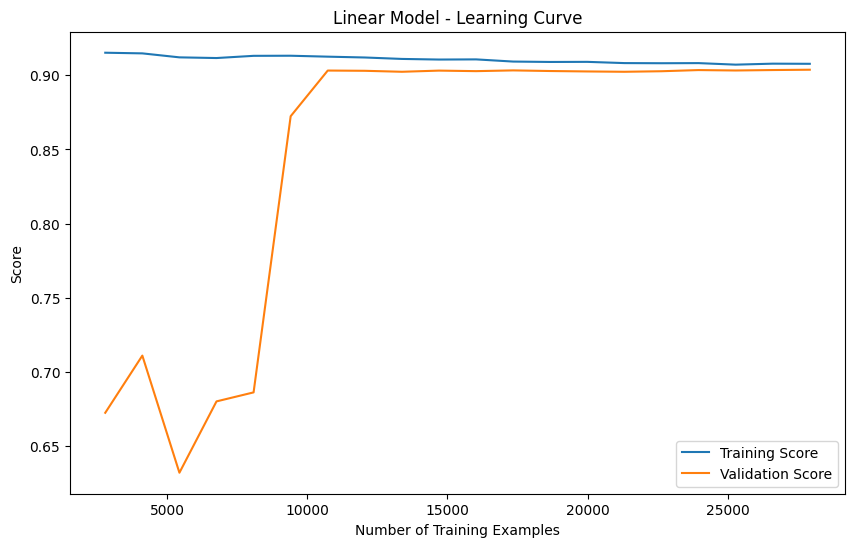

/home/haris/.pyenv/versions/3.10.6/envs/diamondenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.993e+07, tolerance: 4.293e+06
  model = cd_fast.enet_coordinate_descent(
/home/haris/.pyenv/versions/3.10.6/envs/diamondenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.552e+07, tolerance: 6.367e+06
  model = cd_fast.enet_coordinate_descent(
/home/haris/.pyenv/versions/3.10.6/envs/diamondenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

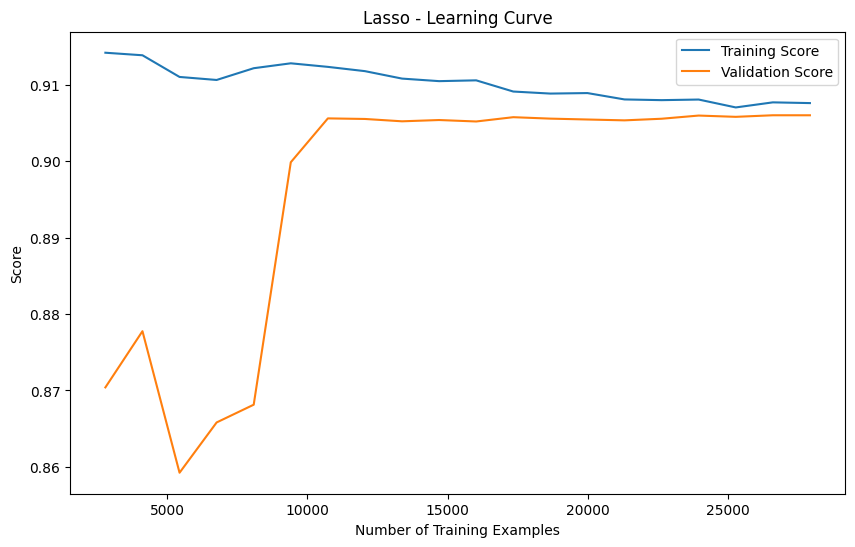

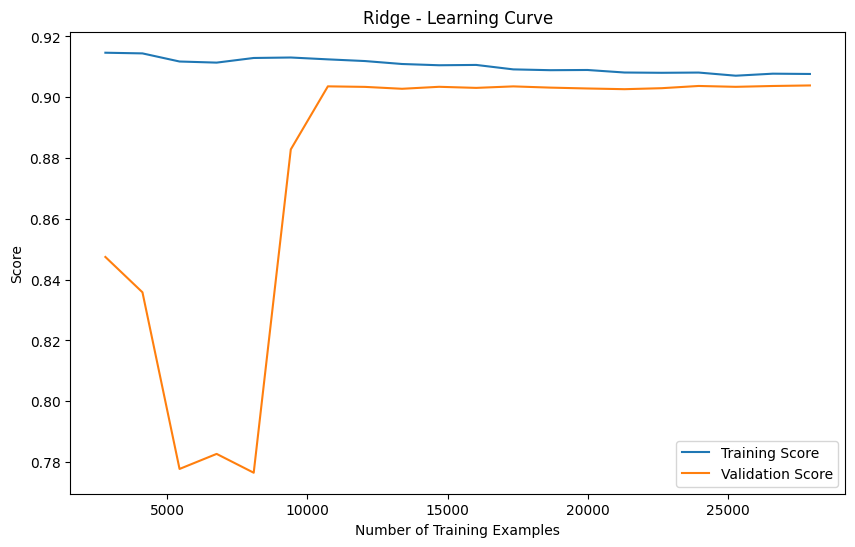

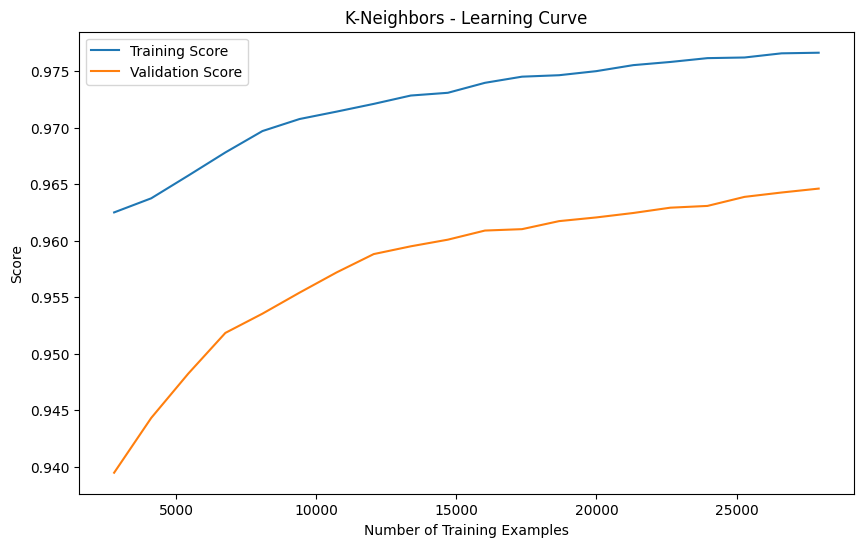

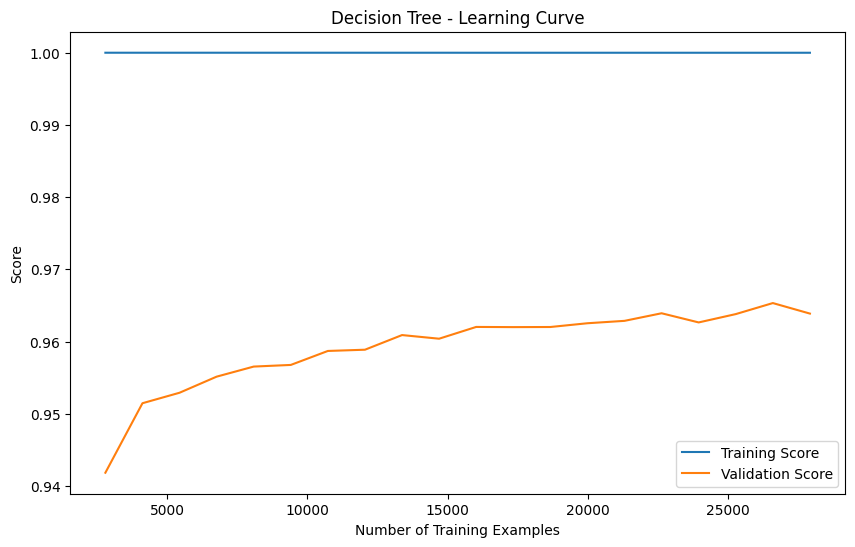

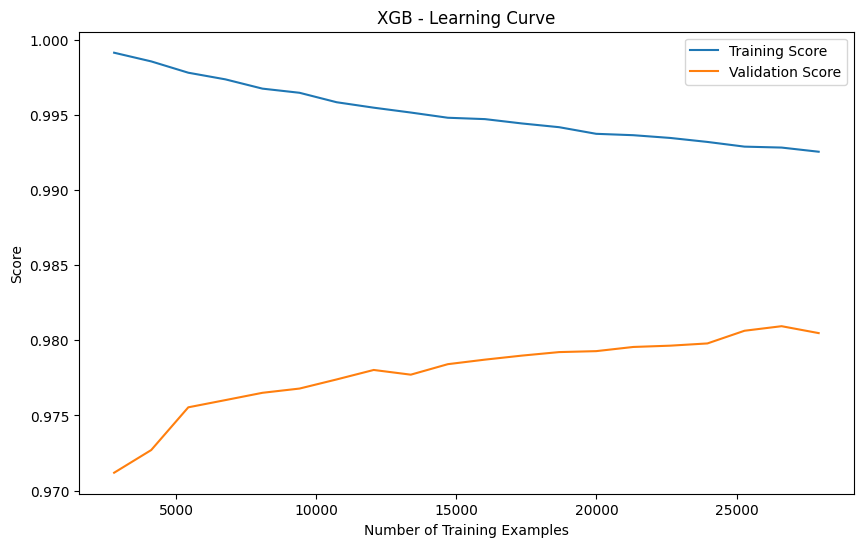

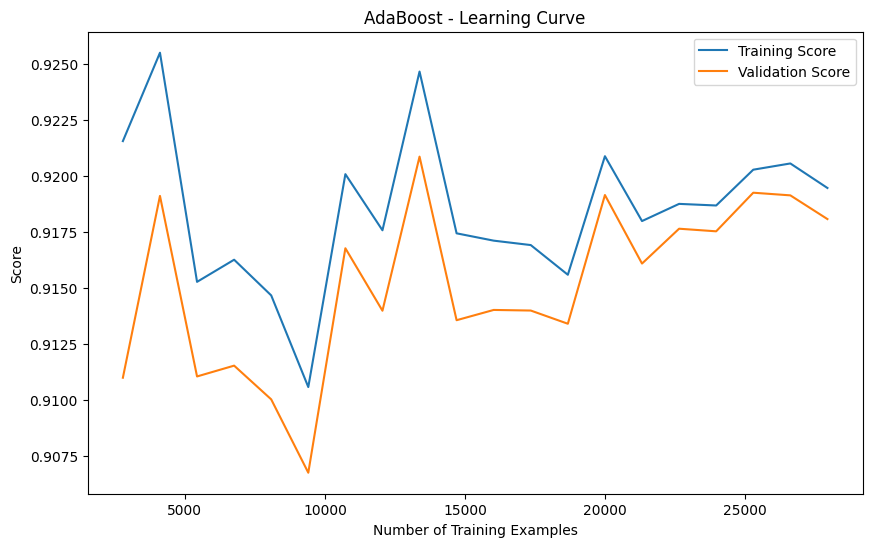

In [34]:
for title, model in models.items():
    compute_learning_curve(model, title, X_transformer_df)

### Next do feature selection using Permutation Importance

In [35]:
from sklearn.inspection import permutation_importance

In [36]:
def get_reversed_permutation_importance(model):
    model.fit(X_transformer_df, y_train)
    result = permutation_importance(model, X_transformer_df, y_train, n_repeats=10, random_state=42)

    importance_df = pd.DataFrame(np.vstack((X_transformer_df.columns, result.importances_mean)).T)
    importance_df.columns = ['features', 'score_decrease']
    importance_df = importance_df.sort_values(by='score_decrease', ascending=False)
    print(importance_df)
    reversed_featured_importance = importance_df['features'].tolist()[::-1]
    print(reversed_featured_importance)
    return reversed_featured_importance

In [37]:
def calculate_scores_remove_features(model, reversed_featured_importance):
    test_scores = []
    temp_X_transformer_df = X_transformer_df.copy()
    cv_results = cross_validate(model, temp_X_transformer_df, y_train, cv=5)
    test_scores.append(np.mean(cv_results['test_score']))

    for feature in reversed_featured_importance:
        if len(temp_X_transformer_df.columns) > 1:
            temp_X_transformer_df = temp_X_transformer_df.drop(columns=[feature], axis='columns')
            cv_results = cross_validate(model, temp_X_transformer_df, y_train, cv=5)
            test_scores.append(np.mean(cv_results['test_score']))
    return test_scores

In [38]:
def plot_scores_remove_features(test_scores, reversed_featured_importance):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(test_scores)), test_scores, marker='o')
    plt.xlabel('Number of Features Removed')
    plt.ylabel('Average Test Score')
    plt.title('Change in Test Scores with Feature Removal')
    plt.xticks(range(len(test_scores)), reversed_featured_importance, rotation=90)
    plt.tight_layout()
    plt.show()

  features score_decrease
0    carat       3.149106
3        x       0.118426
8  clarity       0.085517
7    color       0.037157
4        y        0.00251
6      cut       0.002375
1    depth       0.001832
2    table       0.000421
5        z       0.000175
['z', 'table', 'depth', 'cut', 'y', 'color', 'clarity', 'x', 'carat']


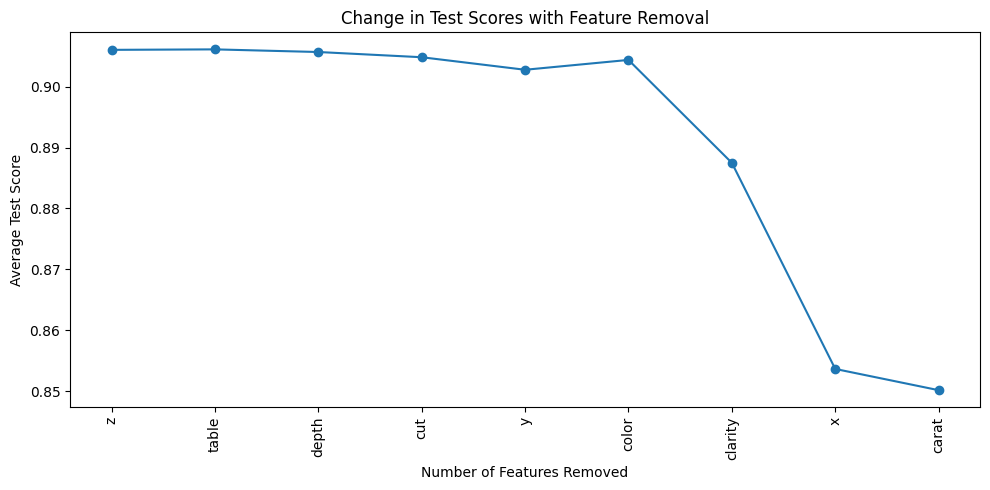

In [39]:
model = Lasso()
reversed_featured_importance = get_reversed_permutation_importance(model)
test_scores = calculate_scores_remove_features(model, reversed_featured_importance)
plot_scores_remove_features(test_scores, reversed_featured_importance)

  features score_decrease
0    carat       0.885041
4        y       0.423251
8  clarity       0.166864
7    color       0.094765
5        z        0.03873
3        x       0.027895
1    depth       0.004698
6      cut       0.003731
2    table       0.002084
['table', 'cut', 'depth', 'x', 'z', 'color', 'clarity', 'y', 'carat']


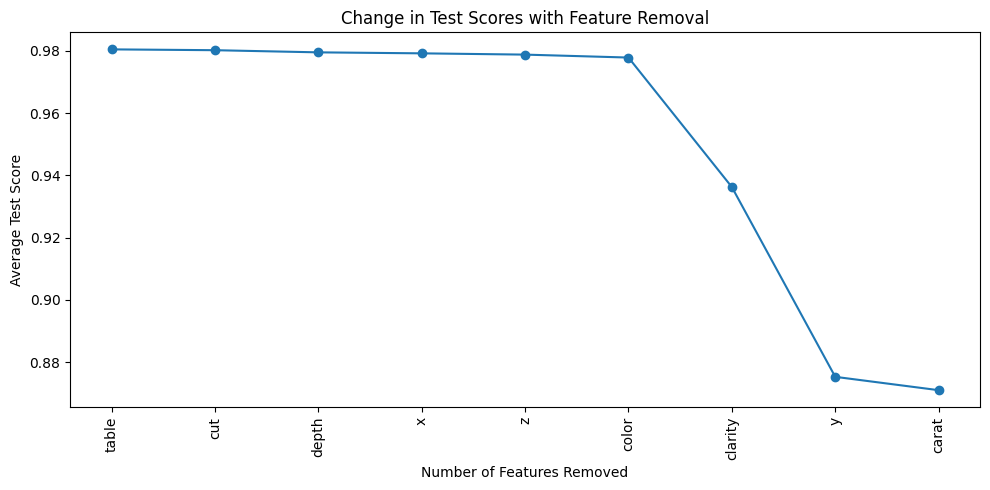

In [40]:
model = XGBRegressor()
reversed_featured_importance = get_reversed_permutation_importance(model)
test_scores = calculate_scores_remove_features(model, reversed_featured_importance)
plot_scores_remove_features(test_scores, reversed_featured_importance)

#### Calculate the score and learning curve again using only the significant Features shown by the Permutation Importance

Title: Lasso Mean train absolute error: -826.109558706499 Mean test absolute error: -826.4662243137784
Title: Lasso Mean R2 train scores: 0.9046290658670477 Mean R2 test scores: 0.904381589338531



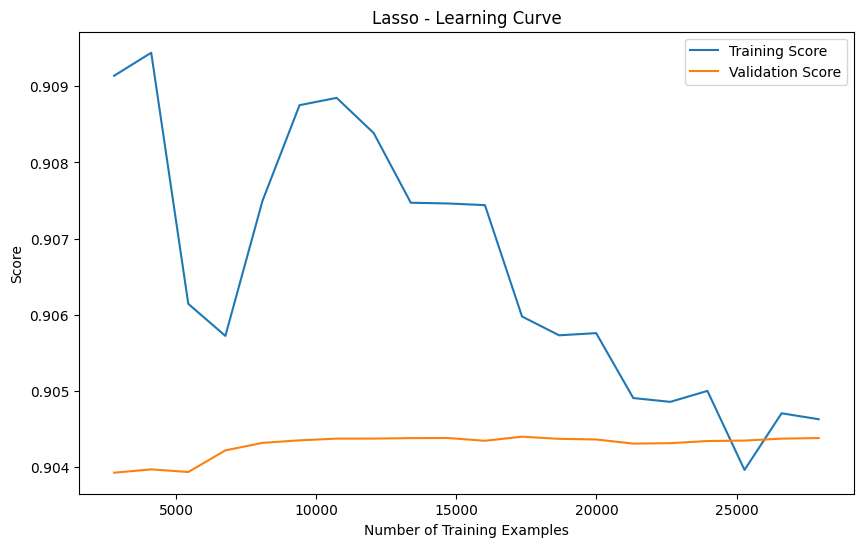

In [41]:
model = Lasso()
slim_X_transformed = X_transformer_df[['carat', 'x', 'clarity', 'color']]
compute_train_test_scores(model, 'Lasso', slim_X_transformed)
compute_learning_curve(model, 'Lasso', slim_X_transformed)

Title: XGBoost Mean train absolute error: -245.3280132664376 Mean test absolute error: -308.8059788890984
Title: XGBoost Mean R2 train scores: 0.9888343402850843 Mean R2 test scores: 0.9779032370425915



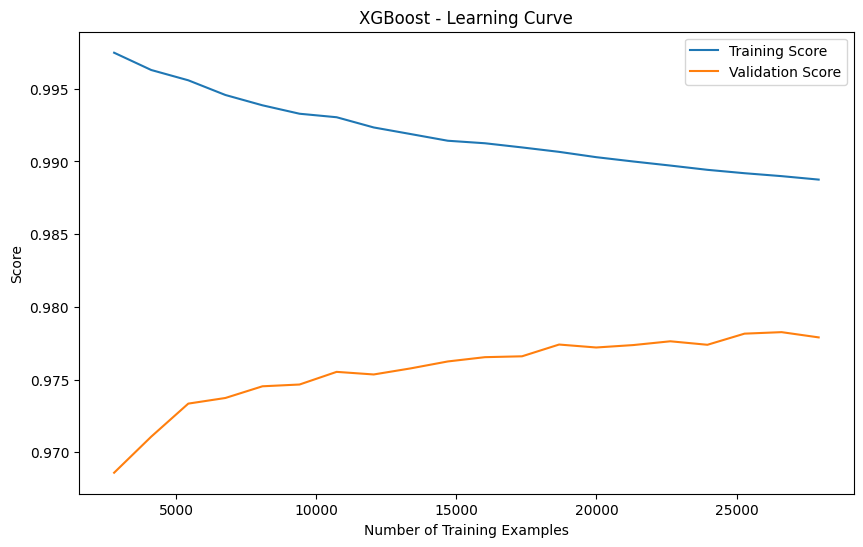

In [42]:
model = XGBRegressor()
slim_X_transformed = X_transformer_df[['carat', 'y', 'clarity', 'color']]
compute_train_test_scores(model, 'XGBoost', slim_X_transformed)
compute_learning_curve(model, 'XGBoost', slim_X_transformed)

#### Tune the parameter for XG Boost using hyperopt

In [43]:
from hyperopt import fmin, tpe, hp, Trials

In [44]:
space = {
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'min_child_weight': hp.uniform('min_child_weight', 1, 3),
    'subsample': hp.choice('subsample ', [0.1, 0.3, 0.5, 0.7, 0.8]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 1),
    'n_estimators': hp.choice('n_estimators', range(10, 300)),
    'gamma': hp.uniform('gamma', 0.1, 5),
    'subsample': hp.uniform('subsample', 0.1 ,1),
}

def objective(params):
    model = XGBRegressor(**params)
    cv_results = cross_validate(model, X_transformer_df, y_train, cv=5, scoring='neg_mean_absolute_error')
    return np.mean(cv_results['test_score']) * -1

trials = Trials()

# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50, trials=trials)

# print("Best hyperparameters:", best)

#### Calculate the score and learning curve once again using lesser Features and the suggested parameters

Title: XGB Mean train absolute error: -265.75138242944035 Mean test absolute error: -301.12391355758643
Title: XGB Mean R2 train scores: 0.9861185226784605 Mean R2 test scores: 0.9797078641158683



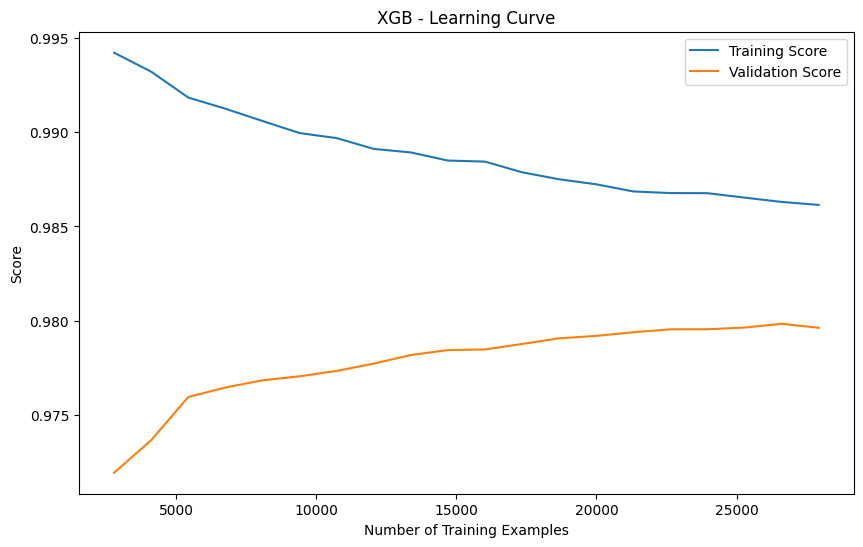

In [45]:
params = {
    'gamma': 3.211999807106297, 
    'learning_rate': 0.0933756237078652, 
    'max_depth': 6, 
    'min_child_weight': 1.8197067071354538, 
    'n_estimators': 141, 
    'subsample': 0.9796443343121042
}

XGBModel = XGBRegressor(**params)
slim_X_transformed = X_transformer_df[['carat', 'y', 'clarity', 'color']]
compute_train_test_scores(XGBModel, 'XGB', slim_X_transformed)
compute_learning_curve(XGBModel, 'XGB', slim_X_transformed)

In [47]:
params = {
    'gamma': 3.211999807106297, 
    'learning_rate': 0.0933756237078652, 
    'max_depth': 6, 
    'min_child_weight': 1.8197067071354538, 
    'n_estimators': 141, 
    'subsample': 0.9796443343121042
}

XGBModel = XGBRegressor(**params)
slim_X_transformed = X_transformer_df[['carat', 'y', 'clarity', 'color']]
XGBModel = XGBModel.fit(slim_X_transformed, y_train)

slim_X_test_transformed = X_test_transformer_df[['carat', 'y', 'clarity', 'color']]
y_pred = XGBModel.predict(slim_X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
max_error = max_error(y_test, y_pred)
rsquared = r2_score(y_test, y_pred)

print(f'MAE: {mae}. Max error: {max_error}. R Squared: {rsquared}')

ValueError: Feature shape mismatch, expected: 4, got 9